In [28]:
import numpy as np
import pygame 
from numpy import random
import time
import matplotlib.pyplot as plt
import os
from scipy import stats
from scipy.optimize import curve_fit

In [2]:
pip install pygame

In [4]:
class Point:
    def __init__(self, infect, radius, angle):
        self.infect = infect
        self.radius = radius
        self.angle = angle


class Grid:
    def __init__(self, scale, size):
        self.points = []
        self.size = size
        self.scale = scale
        self.infected = 1
        for r in random.normal(0, scale, size):
            theta = random.random()*2*np.pi
            point = Point(1, r, theta)
            self.points.append(point)
        self.points[self.size-1].infect = 2     


    @staticmethod        
    def prob(x0, y0, x, y):
        dist = np.sqrt((x0-x)**2 + (y0-y)**2)        
        prob = 1-(dist-1)/(np.sqrt(1+(dist-1)**2))
        return prob
    
    @staticmethod
    def convert_to_cartesian(r, theta):
        x = r*np.cos(theta)
        y = r*np.sin(theta)

        return x, y
    
    def tick(self):      
            for point0 in self.points:
                if point0.infect == 2:
                    x0, y0 = self.convert_to_cartesian(point0.radius, point0.angle)
                    for point in self.points:
                        if point.infect == 1 and point != point0:
                            x, y = self.convert_to_cartesian(point.radius, point.angle)
                            p = random.random()
                            prob = self.prob(x0,y0,x,y)
                            if p <= prob:
                                point.infect = 2
                                self.infected +=1    
    
    def print(self, surface):
        radii = []
        for point in self.points:
            radii.append(point.radius)
            
            if point.infect == 1:                
                
                x, y = self.convert_to_cartesian(point.radius, point.angle)
                pygame.draw.circle(surface, pygame.Color(0,255,0), (500+x, 500+y), 2) 
            else:                 
                x, y = self.convert_to_cartesian(point.radius, point.angle)
                pygame.draw.circle(surface, pygame.Color(255,0,0), (500+x, 500+y), 2) 
            

        radius = max(radii) + 40
        pygame.draw.circle(surface, pygame.Color(0,0,0),(500,500), radius, width=1)   
    



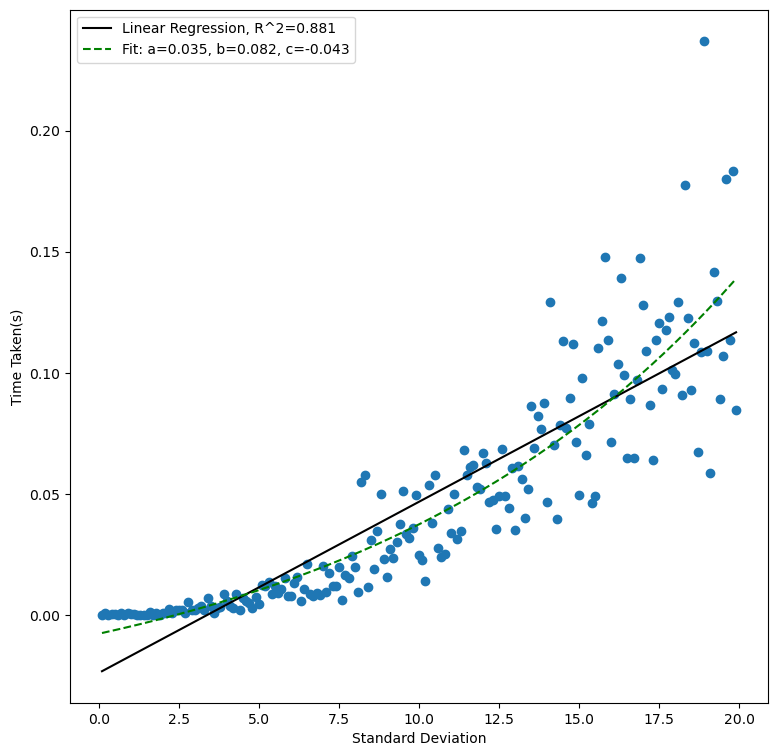

In [98]:
time_list = []
scale_list = np.arange(0.1, 1000, 0.1)
   
for scale in scale_list:
    grid = Grid(scale, 50)
    time1 = time.time()
    while grid.infected < grid.size:
        grid.tick()
            

    time2= time.time()
    print("Time taken:", time2-time1)
    time_list.append(time2-time1)  


def func(x,a,b,c):
    return a*np.exp(b*x)+c

    
fig, ax = plt.subplots(figsize = (9, 9))

ax.scatter(scale_list, time_list)
res = stats.linregress(scale_list, time_list)   
popt, pcov = curve_fit(func, scale_list, time_list)
ax.set_xlabel("Standard Deviation")
ax.set_ylabel("Time Taken(s)")
ax.plot(scale_list, res.intercept+res.slope*scale_list, color ="k", label="Linear Regression, R^2=%2.0f" % res.rvalue)
ax.plot(scale_list, func(scale_list, *popt), "g--", label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
ax.legend()

In [39]:
pygame.init()
screen = pygame.display.set_mode((1000,1000))
pygame.display.set_caption("Pandemic Simulation v1.0")
font = pygame.font.SysFont( "arial", 25, True, False)


run = True
grid = Grid(100,1000)
time0 = time.time()

while run:   
    screen.fill((255,255,255)) 
    grid.tick()
    grid.print(screen)
    time1 = time.time()-time0

    
        

    text1 = font.render('Infected: %i' % grid.infected, True, pygame.Color(0,0,0))
    text2 = font.render('Population: %i' % grid.size, True, pygame.Color(0,0,0))
    text3 = font.render("Time: %f" % time1, True, pygame.Color(0,0,0))


    text1_rect = text1.get_rect()
    text2_rect = text2.get_rect()
    text3_rect = text3.get_rect()

    text1_rect.centerx = 75
    text1_rect.centery = 10
    text2_rect.centerx = 90
    text2_rect.centery= 50
    text3_rect.centerx = 80
    text3_rect.centery = 90

    screen.blit(text1, text1_rect)
    screen.blit(text2, text2_rect)
    screen.blit(text3, text3_rect)



    if grid.infected >= grid.size:
        run = False
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run = False
    pygame.display.update()
pygame.quit()

print("Time Taken:", time1)
    

   

Time Taken: 11.620320796966553
